<a href="https://colab.research.google.com/github/poojatambe/Segmentation_models_on_custom_data/blob/main/yolov8_instance_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
! git clone https://github.com/ultralytics/ultralytics.git

Cloning into 'ultralytics'...
remote: Enumerating objects: 7441, done.
remote: Counting objects: 100% (77/77), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 7441 (delta 38), reused 48 (delta 30), pack-reused 7364
Receiving objects: 100% (7441/7441), 5.10 MiB | 8.92 MiB/s, done.
Resolving deltas: 100% (5171/5171), done.


**Custom_data**

The custom used is food data with 3 classes cookies, croissant, cupcake.

This dataset contains total 50 images.

Upload dataset(/content/Food-detection-1) on current runtime.

# Training on custom dataset

In [ ]:
# training for 500 epochs.
%cd /content/ultralytics/ultralytics
!yolo task=segment mode=train model=yolov8s-seg.pt data=/content/Food-detection-1/data.yaml epochs=500 imgsz=640

/content/ultralytics/ultralytics
Ultralytics YOLOv8.0.58 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/content/Food-detection-1/data.yaml, epochs=500, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras

# Inference

In [ ]:
# prediction
model= YOLO('/content/ultralytics/ultralytics/runs/segment/train4/weights/best.pt') # put weight file in YOLO function.
results = model.predict(source="/content/Food-detection-1/valid/images/tom-paolini-dCKQMAzy8II-unsplash_jpg.rf.086aaa70e1f07aac3adb6ed9b246769f.jpg") # put image for prediction


image 1/1 /content/Food-detection-1/valid/images/tom-paolini-dCKQMAzy8II-unsplash_jpg.rf.086aaa70e1f07aac3adb6ed9b246769f.jpg: 640x640 1 croissant, 21.8ms
Speed: 0.5ms preprocess, 21.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


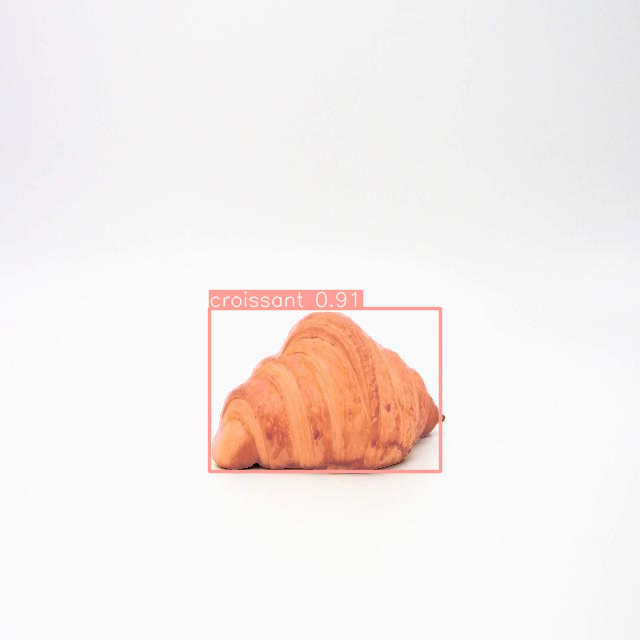

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow 

res_plotted = results[0].plot()
cv2_imshow(res_plotted)
 

# Export to ONNX

In [ ]:
model.export(format="onnx",opset=12)  # export the model to ONNX format

Ultralytics YOLOv8.0.58 🚀 Python-3.9.16 torch-1.13.1+cu116 CPU

PyTorch: starting from /content/ultralytics/ultralytics/runs/segment/train4/weights/best.pt with input shape (1, 3, 640, 640) BCHW and output shape(s) ((1, 39, 8400), (1, 32, 160, 160)) (22.7 MB)
requirements: YOLOv8 requirement "onnx>=1.12.0" not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 63.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 58.8 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.6
    Uninstalling protobuf-3.19.6:
      Successfully uninstalled protobuf-3.19.6

requirements: 1 package updated per ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.13.1...
ONNX: export success ✅ 11.6s, saved as /content/ultralytics

'/content/ultralytics/ultralytics/runs/segment/train4/weights/best.onnx'